In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/TurkeyDataset.csv'

df = pd.read_csv(path)
display(df.head(10))

Mounted at /content/drive


,Date (Montly),Gross Income,Population,Load (hourly) Mwh,Immediate load Mwh,Import Gwh,Export Gwh,Gross Production GWH,Transmitted energy GWH,Net Electricity Consumption Kwh,T.C. Elektricity consumption (Gross Demand) Kwh,Lost Electricty Kwh,Unnamed: 12
0,1.1976(January),2490453.59,40446729.0,2676.8,2701.6,0.3,0.0,1321.1,1194.0,1.322210e+09,1.530309e+09,2.080999e+08,2.080999e+08
1,2.1976,2490453.59,40446729.0,2700.5,2736.9,0.2,0.0,1139.8,1118.2,1.234464e+09,1.428754e+09,1.942898e+08,NaN
2,3.1976,2490453.59,40446729.0,2725.6,2762.4,24.5,0.0,1262.2,1214.6,1.331969e+09,1.541605e+09,2.096359e+08,NaN
3,4.1976,2490453.59,40446729.0,2664.7,2702.2,32.7,0.0,1219.7,1118.0,1.234452e+09,1.428740e+09,1.942879e+08,NaN
4,5.1976,2490453.59,40446729.0,2599.2,2662.8,36.5,0.0,1226.7,1123.3,1.235848e+09,1.430355e+09,1.945076e+08,NaN
5,6.1976,2490453.59,40446729.0,2608.9,2628.6,29.8,0.0,1225.1,1146.5,1.256131e+09,1.453831e+09,1.976999e+08,NaN
6,7.1976,2490453.59,40446729.0,2664.4,2979.5,33.9,0.0,1280.0,1227.5,1.323255e+09,1.531520e+09,2.082645e+08,NaN
7,8.1976,2490453.59,40446729.0,2335.1,2774.6,30.0,0.0,1291.8,1243.8,1.332451e+09,1.542162e+09,2.097117e+08,NaN
8,9.1976,2490453.59,40446729.0,2835.3,2861.6,28.7,0.0,1346.9,1212.7,1.333936e+09,1.543881e+09,2.099454e+08,NaN
9,10.1976,2490453.59,40446729.0,2966.0,3018.7,33.0,0.0,1351.4,1316.1,1.442824e+09,1.669907e+09,2.270832e+08,NaN


In [ ]:
# Define a function to process the date values
def process_date(date_value):
    dot_index = date_value.find(".")
    if dot_index != -1:  # Check if dot exists in the date_value
        if len(date_value[dot_index + 1:]) == 4:
            return "1-" + date_value[0:dot_index] + "-" + date_value[dot_index + 1:]
        else:
            return "1-" + date_value[0:dot_index] + "-" + date_value[dot_index + 1:] + '0'
    else:
        # Handle cases where dot is not found, you can choose to return the original value or handle it differently
        return date_value

# Apply the function to the 'Date (Montly)' column
df['Date (Montly)'] = df['Date (Montly)'].apply(process_date)
df

,Date (Montly),Gross Income,Population,Load (hourly) Mwh,Immediate load Mwh,Import Gwh,Export Gwh,Gross Production GWH,Transmitted energy GWH,Net Electricity Consumption Kwh,T.C. Elektricity consumption (Gross Demand) Kwh,Lost Electricty Kwh,Unnamed: 12
0,1-1-1976(January)0,2490453.59,40446729.0,2676.8,2701.6,0.30,0.00,1321.10,1194.00,1.322210e+09,1.530309e+09,2.080999e+08,2.080999e+08
1,1-2-1976,2490453.59,40446729.0,2700.5,2736.9,0.20,0.00,1139.80,1118.20,1.234464e+09,1.428754e+09,1.942898e+08,NaN
2,1-3-1976,2490453.59,40446729.0,2725.6,2762.4,24.50,0.00,1262.20,1214.60,1.331969e+09,1.541605e+09,2.096359e+08,NaN
3,1-4-1976,2490453.59,40446729.0,2664.7,2702.2,32.70,0.00,1219.70,1118.00,1.234452e+09,1.428740e+09,1.942879e+08,NaN
4,1-5-1976,2490453.59,40446729.0,2599.2,2662.8,36.50,0.00,1226.70,1123.30,1.235848e+09,1.430355e+09,1.945076e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,Aug-10,8811567.75,72752325.0,33191.0,33391.9,78.72,246.40,20620.81,18139.26,1.636251e+10,2.045313e+10,4.090627e+09,NaN
416,Sep-10,8811567.75,72752325.0,29395.0,29637.1,92.34,137.98,17139.65,15077.86,1.367520e+10,1.709400e+10,3.418801e+09,NaN
417,Oct-10,8811567.75,72752325.0,27291.0,27582.9,132.17,105.08,17291.00,15137.43,1.385448e+10,1.731810e+10,3.463619e+09,NaN
418,Nov-10,8811567.75,72752325.0,29596.0,30107.9,142.68,112.30,16464.48,14396.39,1.319589e+10,1.649486e+10,3.298971e+09,NaN


In [ ]:
df_slice = df.loc[192:]
df_slice


,Date (Montly),Gross Income,Population,Load (hourly) Mwh,Immediate load Mwh,Import Gwh,Export Gwh,Gross Production GWH,Transmitted energy GWH,Net Electricity Consumption Kwh,T.C. Elektricity consumption (Gross Demand) Kwh,Lost Electricty Kwh,Unnamed: 12
192,Jan-92,4504362.66,56012109.0,9684.0,9848.6,0.00,70.20,5667.00,4721.30,4.494629e+09,5.596783e+09,1.102154e+09,NaN
193,Feb-92,4504362.66,56012109.0,9462.0,9593.2,0.00,70.60,5264.30,4420.10,4.170912e+09,5.193685e+09,1.022774e+09,NaN
194,Mar-92,4504362.66,56012109.0,9419.0,9530.6,0.00,67.40,5664.00,4763.50,4.494383e+09,5.596477e+09,1.102094e+09,NaN
195,Apr-92,4504362.66,56012109.0,9095.0,9172.9,27.50,1.00,4888.50,4096.10,3.946972e+09,4.914832e+09,9.678603e+08,NaN
196,May-92,4504362.66,56012109.0,9060.0,9329.7,46.40,0.40,5270.90,4429.10,4.269967e+09,5.317031e+09,1.047064e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,Aug-10,8811567.75,72752325.0,33191.0,33391.9,78.72,246.40,20620.81,18139.26,1.636251e+10,2.045313e+10,4.090627e+09,NaN
416,Sep-10,8811567.75,72752325.0,29395.0,29637.1,92.34,137.98,17139.65,15077.86,1.367520e+10,1.709400e+10,3.418801e+09,NaN
417,Oct-10,8811567.75,72752325.0,27291.0,27582.9,132.17,105.08,17291.00,15137.43,1.385448e+10,1.731810e+10,3.463619e+09,NaN
418,Nov-10,8811567.75,72752325.0,29596.0,30107.9,142.68,112.30,16464.48,14396.39,1.319589e+10,1.649486e+10,3.298971e+09,NaN


In [ ]:
months = ["Jan", "Feb","Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for date_value in df_slice['Date (Montly)']:
  n = 0
  dash_index = date_value.index("-")
  if  n < 226:
    for month_value in months:
      if date_value[0:dash_index] == month_value:
        month_index_value = months.index(date_value[0:dash_index]) + 1
        if date_value[dash_index + 1:dash_index + 2] == "9":
          new_date_value = "1-" + str(month_index_value) + "-" + "19" + date_value[dash_index + 1:]
          df['Date (Montly)'].replace(date_value, new_date_value, inplace=True)
          n = n + 1
        else:
          new_date_value = "1-" + str(month_index_value) + "-" + "20" + date_value[dash_index + 1:]
          df['Date (Montly)'].replace(date_value, new_date_value, inplace=True)
          n = n + 1

In [ ]:
df_slice

,Date (Montly),Gross Income,Population,Load (hourly) Mwh,Immediate load Mwh,Import Gwh,Export Gwh,Gross Production GWH,Transmitted energy GWH,Net Electricity Consumption Kwh,T.C. Elektricity consumption (Gross Demand) Kwh,Lost Electricty Kwh,Unnamed: 12
192,1-1-1992,4504362.66,56012109.0,9684.0,9848.6,0.00,70.20,5667.00,4721.30,4.494629e+09,5.596783e+09,1.102154e+09,NaN
193,1-2-1992,4504362.66,56012109.0,9462.0,9593.2,0.00,70.60,5264.30,4420.10,4.170912e+09,5.193685e+09,1.022774e+09,NaN
194,1-3-1992,4504362.66,56012109.0,9419.0,9530.6,0.00,67.40,5664.00,4763.50,4.494383e+09,5.596477e+09,1.102094e+09,NaN
195,1-4-1992,4504362.66,56012109.0,9095.0,9172.9,27.50,1.00,4888.50,4096.10,3.946972e+09,4.914832e+09,9.678603e+08,NaN
196,1-5-1992,4504362.66,56012109.0,9060.0,9329.7,46.40,0.40,5270.90,4429.10,4.269967e+09,5.317031e+09,1.047064e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1-8-2010,8811567.75,72752325.0,33191.0,33391.9,78.72,246.40,20620.81,18139.26,1.636251e+10,2.045313e+10,4.090627e+09,NaN
416,1-9-2010,8811567.75,72752325.0,29395.0,29637.1,92.34,137.98,17139.65,15077.86,1.367520e+10,1.709400e+10,3.418801e+09,NaN
417,1-10-2010,8811567.75,72752325.0,27291.0,27582.9,132.17,105.08,17291.00,15137.43,1.385448e+10,1.731810e+10,3.463619e+09,NaN
418,1-11-2010,8811567.75,72752325.0,29596.0,30107.9,142.68,112.30,16464.48,14396.39,1.319589e+10,1.649486e+10,3.298971e+09,NaN


<ipython-input-7-3325c2a96e6f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr().round(2)


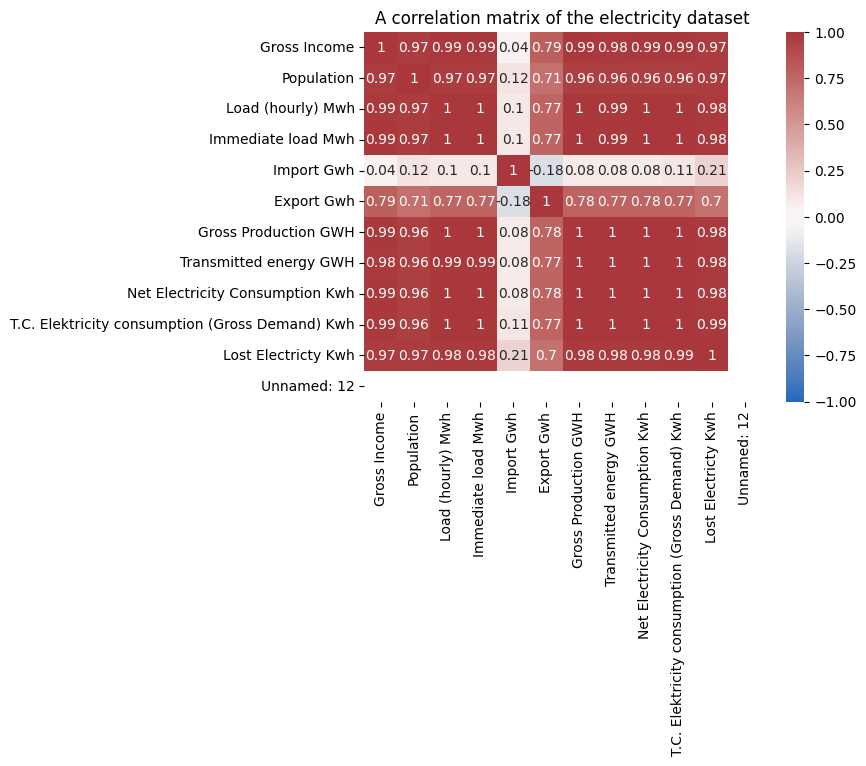

In [ ]:
matrix = df.corr().round(2)
sns.heatmap(matrix, cbar = True, annot = True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('A correlation matrix of the electricity dataset')
plt.show()

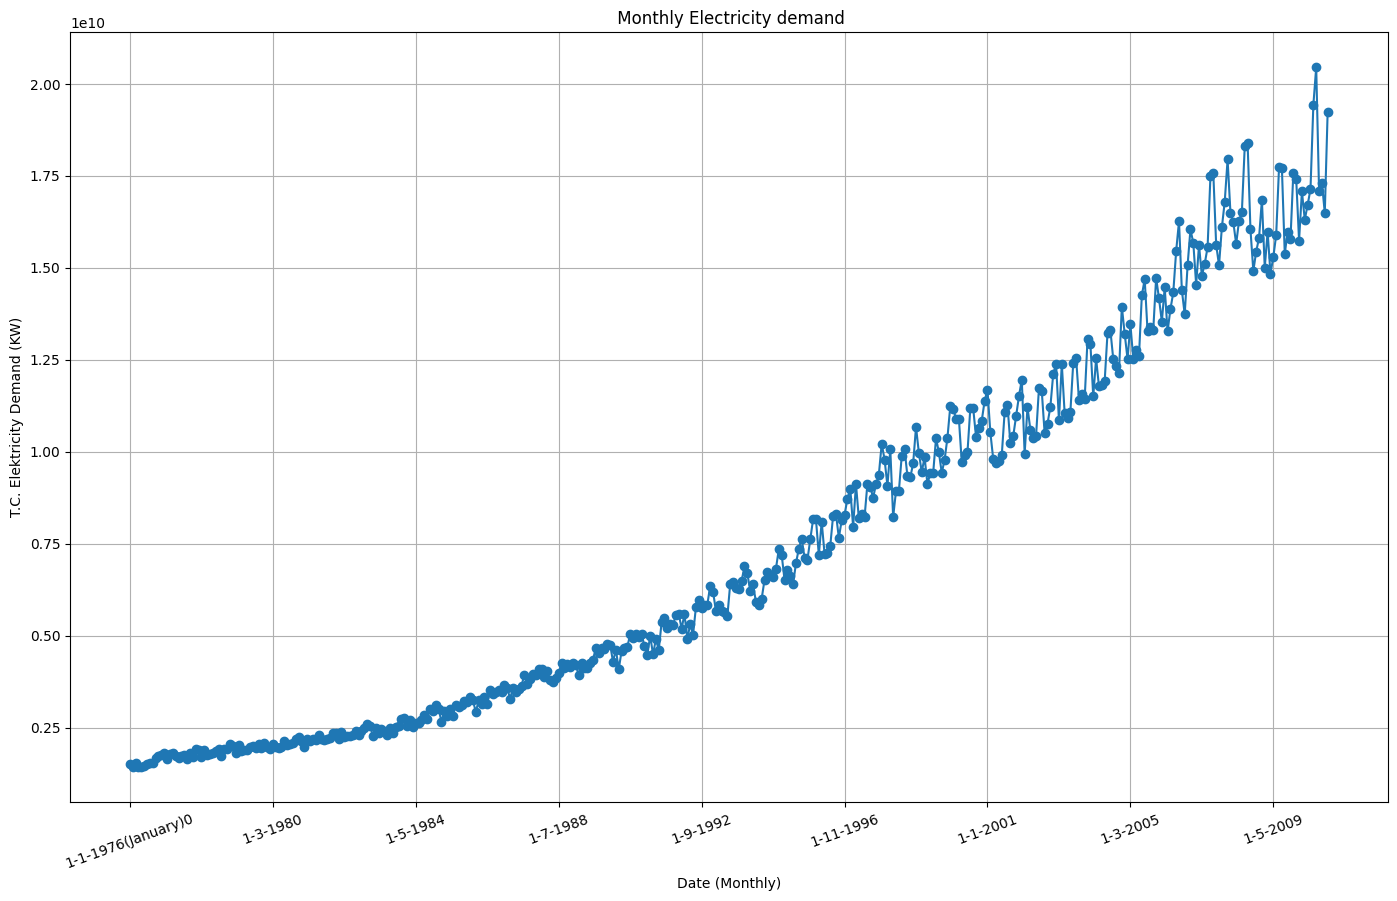

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define a function to handle inconsistent date formats (optional)
def format_date(date_str):
  # Modify this logic based on your specific date format variations
  # This example assumes conversion from "Month-YYYY" to YYYY-MM
  try:
    year = int(date_str.split("-")[1])
    month = int(date_str.split("-")[0][:3])  # Extract month abbreviation
    return f"{year:04d}-{month:02d}"
  except ValueError:
    # Handle invalid date formats (optional)
    return None

# Apply formatting function to the 'Date (Montly)' column (optional)
# df['Date (Montly)'] = df['Date (Montly)'].apply(format_date)

# Plot the graph (assuming 'Date (Montly)' is in YYYY-MM format)
plt.figure(figsize=(17, 10))  # Adjust figure size as needed
plt.plot(df['Date (Montly)'], df["T.C. Elektricity consumption (Gross Demand) Kwh"], marker='o', linestyle='-')

# Customize the plot
plt.xlabel("Date (Monthly)")
plt.ylabel("T.C. Elektricity Demand (KW)")
plt.title(" Monthly Electricity demand")
plt.grid(True)
plt.xticks(rotation=20)  # Rotate x-axis labels for better readability with long month names
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.show()


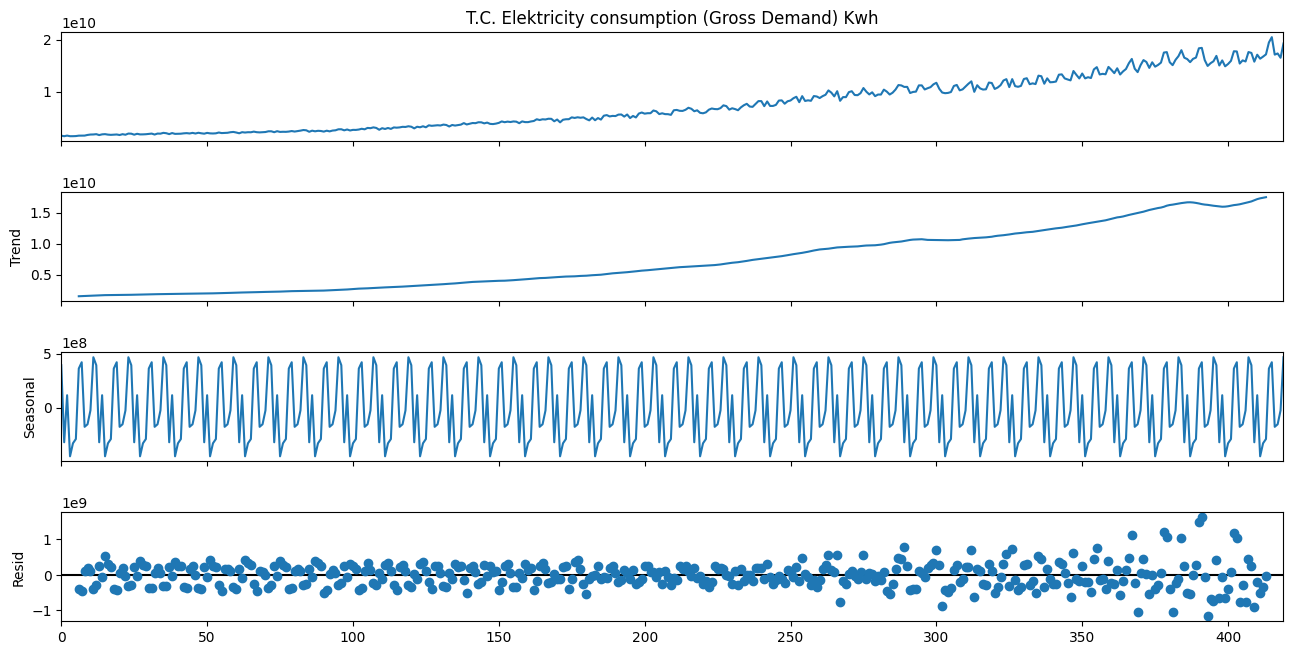

In [ ]:
decomp = seasonal_decompose(df["T.C. Elektricity consumption (Gross Demand) Kwh"],period = 12)
fig = decomp.plot()
fig.set_size_inches(14,7)

In [ ]:
numerical_summary = df.describe()
print("Summary Statistics for Numerical Variables:")
print(numerical_summary)

Summary Statistics for Numerical Variables:
       Gross Income    Population  Load (hourly) Mwh  Immediate load Mwh  \
count  4.200000e+02  4.200000e+02         420.000000          420.000000   
mean   4.932825e+06  5.682020e+07       12690.103571        12850.518333   
std    1.955774e+06  9.651430e+06        8300.987085         8371.605034   
min    2.490454e+06  4.044673e+07        2335.100000         2125.400000   
25%    3.082549e+06  4.836068e+07        5187.950000         5273.775000   
50%    4.601099e+06  5.695999e+07       10574.500000        10795.000000   
75%    6.043319e+06  6.544616e+07       18809.000000        19049.400000   
max    8.811568e+06  7.275232e+07       33191.000000        33391.900000   

       Import Gwh  Export Gwh  Gross Production GWH  Transmitted energy GWH  \
count  420.000000  420.000000            420.000000              420.000000   
mean   106.388333   44.901095           7311.020381             6124.715119   
std    105.037278   62.721470     

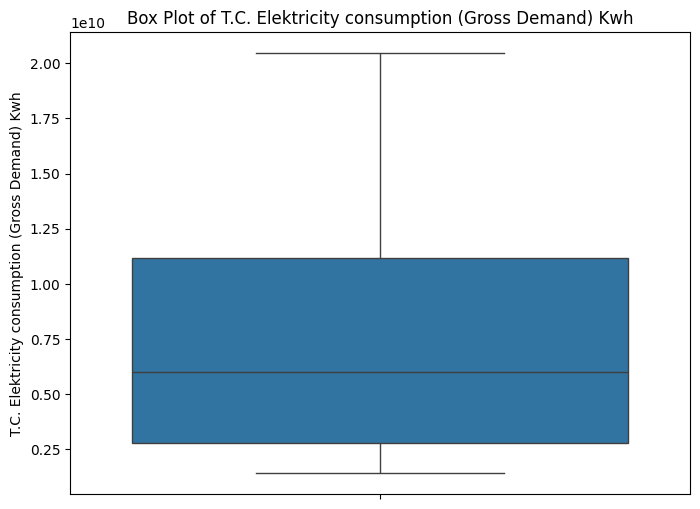

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='T.C. Elektricity consumption (Gross Demand) Kwh', showfliers='True')
plt.title('Box Plot of T.C. Elektricity consumption (Gross Demand) Kwh')
plt.ylabel('T.C. Elektricity consumption (Gross Demand) Kwh')
plt.show()

In [ ]:
# Splitting into train and test set
train_demand = df[:295]
test_demand = df[296:]

# Fitting the model
fitted_model = ExponentialSmoothing(train_demand['T.C. Elektricity consumption (Gross Demand) Kwh'],trend='add',seasonal='mul',seasonal_periods=12).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


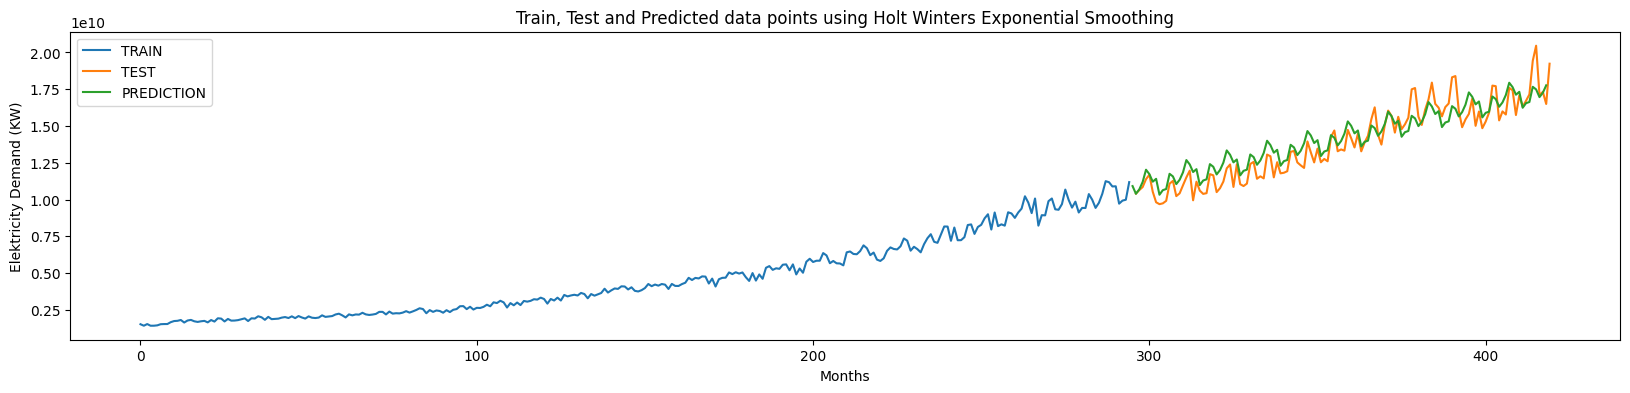

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model on training data
model = ExponentialSmoothing(train_demand['T.C. Elektricity consumption (Gross Demand) Kwh'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()

# Forecast future values
test_predict = fitted_model.forecast(len(test_demand))

# Plotting
plt.figure(figsize=(20, 4))
train_demand['T.C. Elektricity consumption (Gross Demand) Kwh'].plot(legend=True, label='TRAIN')
test_demand['T.C. Elektricity consumption (Gross Demand) Kwh'].plot(legend=True, label='TEST')
test_predict.plot(legend=True, label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')
plt.xlabel("Months")
plt.ylabel("Elektricity Demand (KW)")
plt.show()


In [ ]:
#model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

n_test= test_demand['T.C. Elektricity consumption (Gross Demand) Kwh']
#mse = np.sqrt(mean_squared_error(n_test, test_predict))
#mse


#mean absolute error
mae = mean_absolute_error(n_test, test_predict)
print("MAE:", mae)

#mean absolute percentage error
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape


mape = MAPE(n_test, test_predict)
print("MAPE:", mape)

#percentage accuracy
pa = 100-mape
print("Percenatage accuarcy:", pa)

MAE: 884570155.2783781
MAPE: 5.806162359039326
Percenatage accuarcy: 94.19383764096068


**POWER ECON SHORT TERM FORECAST MODEL**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Mount Google Drive
drive.mount('/content/MyDrive/')

# Use the correct path to your CSV file in Drive
file_path = '/content/MyDrive/MyDrive/shortterm.csv'

# Load the CSV
df = pd.read_csv(file_path)

# Preview
df.head(12)

Mounted at /content/MyDrive/


,Date,Month,Peak Demand(MW)
0,2012,Jan,448.062952
1,2012,Feb,448.486469
2,2012,Mar,445.940452
3,2012,Apr,449.277052
4,2012,May,461.699124
5,2012,Jun,518.058811
6,2012,Jul,490.722800
7,2012,Aug,482.185342
8,2012,Sep,482.185342
9,2012,Oct,482.185342


In [ ]:
data = pd.DataFrame(df)

# Combine 'Date' and 'Month' columns into a single datetime column
df['Datetime'] = pd.to_datetime(df['Month'] + ' ' + df['Date'].astype(str))

# Optional: Rearranging columns
df = df[['Datetime', 'Peak Demand(MW)']]

# Display the result
print(df)

      Datetime  Peak Demand(MW)
0   2012-01-01       448.062952
1   2012-02-01       448.486469
2   2012-03-01       445.940452
3   2012-04-01       449.277052
4   2012-05-01       461.699124
..         ...              ...
151 2024-08-01      1025.686061
152 2024-09-01      1024.032041
153 2024-10-01      1063.490000
154 2024-11-01      1095.980000
155 2024-12-01      1117.900000

[156 rows x 2 columns]


<ipython-input-3-8bb4b15e9f10>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Month'] + ' ' + df['Date'].astype(str))


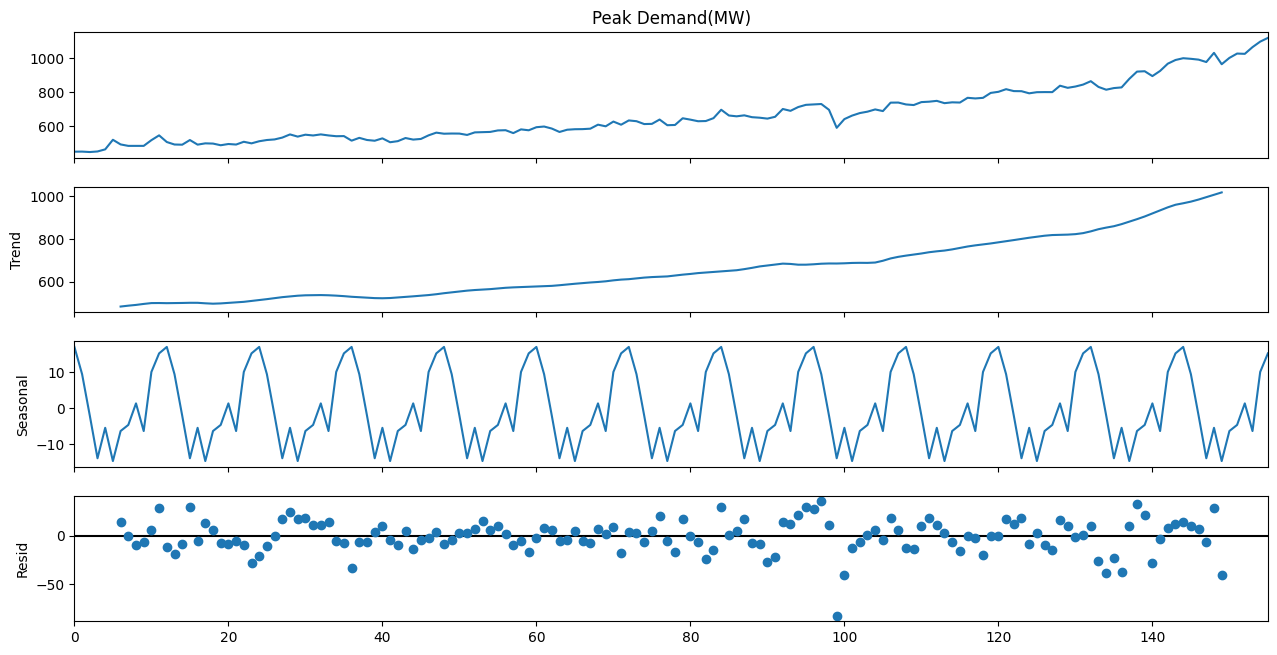

In [ ]:
decomp = seasonal_decompose(df["Peak Demand(MW)"],period = 12)
fig = decomp.plot()
fig.set_size_inches(14,7)

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])  # Make sure it's in datetime format
df.set_index('Datetime', inplace=True)       # Set it as the index


In [ ]:
# Splitting into train and test set
train_Pdemand = df[:133]
test_Pdemand = df[133:]

# Fitting the model
Pmodel = ExponentialSmoothing(train_Pdemand['Peak Demand(MW)'],
                              trend='add',
                              seasonal='add',
                              seasonal_periods=12)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


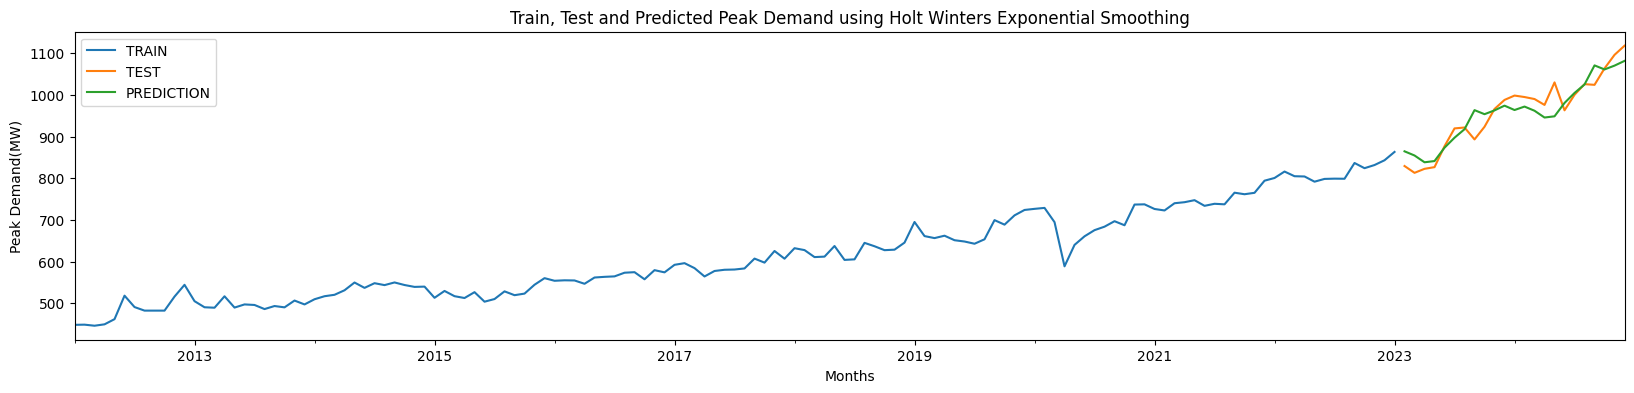

MAPE: 2.68%
MAE: 25.492195970755535, RMSE: 32.68844546144591


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model on training data
#model = ExponentialSmoothing(train_Pdemand['Peak Demand(MW)'], trend='add', seasonal='add', seasonal_periods=12)
#fitted_Pmodel = model.fit()

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define and fit model
fitted_Pmodel = Pmodel.fit(smoothing_level=0.8,
                           smoothing_trend=0.2,
                           smoothing_seasonal=0.4,
                           optimized=False)


# Forecast future values
test_prediction = fitted_Pmodel.forecast(len(test_Pdemand))

# Fix index for plotting
test_prediction.index = test_Pdemand.index  # 👈 This fixes the error

# Plotting
plt.figure(figsize=(20, 4))
train_Pdemand['Peak Demand(MW)'].plot(legend=True, label='TRAIN')
test_Pdemand['Peak Demand(MW)'].plot(legend=True, label='TEST')
test_prediction.plot(legend=True, label='PREDICTION')
plt.title('Train, Test and Predicted Peak Demand using Holt Winters Exponential Smoothing')
plt.xlabel("Months")
plt.ylabel("Peak Demand(MW)")
plt.show()


#model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_Pdemand['Peak Demand(MW)'], test_prediction)
rmse = np.sqrt(mean_squared_error(test_Pdemand['Peak Demand(MW)'], test_prediction))
mape = np.mean(np.abs((test_Pdemand['Peak Demand(MW)'] - test_prediction) / test_Pdemand['Peak Demand(MW)'])) * 100
print(f'MAPE: {mape:.2f}%')


print(f'MAE: {mae}, RMSE: {rmse}')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


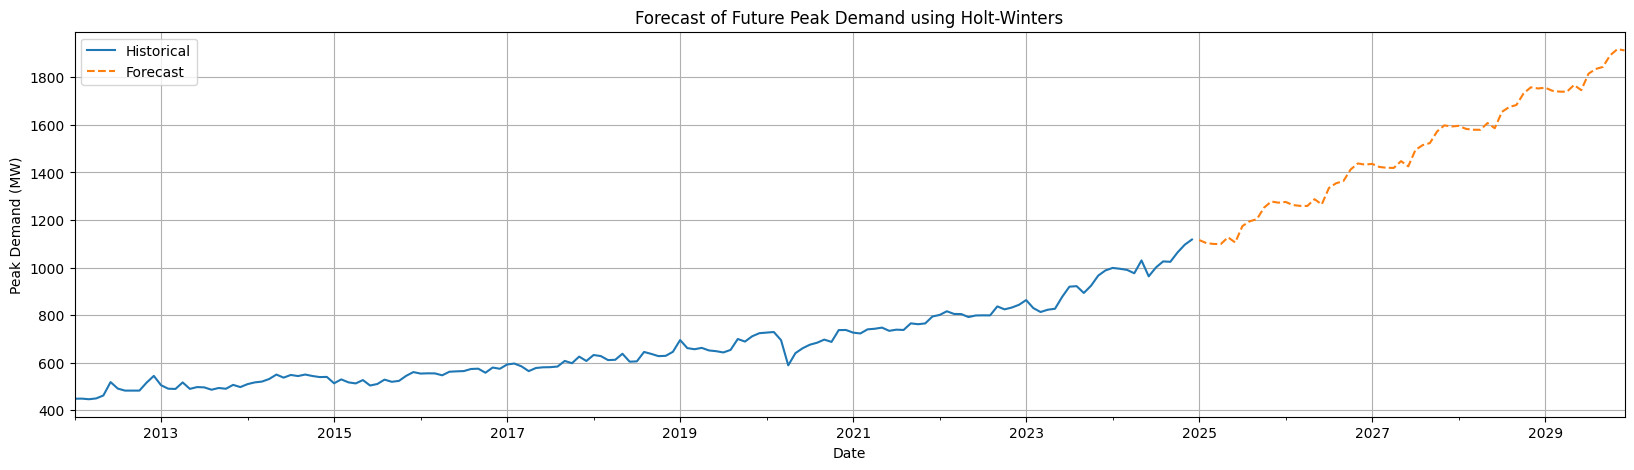

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Fit on the full data (not just train)
full_model = ExponentialSmoothing(df['Peak Demand(MW)'],
                                   trend='add',
                                   seasonal='add',
                                   seasonal_periods=12).fit(
                                   smoothing_level=0.8,
                                   smoothing_trend=0.2,
                                   smoothing_seasonal=0.4,
                                   optimized=False)

# Step 2: Forecast for N future periods (e.g., 12 months)
n_future = 60
future_forecast = full_model.forecast(n_future)

# Step 3: Create future date index
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),
                             periods=n_future, freq='MS')  # MS = Month Start

# Assign the future dates as index
future_forecast.index = future_dates

# Step 4: Plot full series with forecast
plt.figure(figsize=(20, 5))
df['Peak Demand(MW)'].plot(label='Historical', legend=True)
future_forecast.plot(label='Forecast', legend=True, linestyle='--')
plt.title('Forecast of Future Peak Demand using Holt-Winters')
plt.xlabel('Date')
plt.ylabel('Peak Demand (MW)')
plt.grid(True)
plt.show()



In [ ]:
future_forecast

,0
2025-01-01,1115.635273
2025-02-01,1102.738817
2025-03-01,1099.165139
2025-04-01,1098.750982
2025-05-01,1127.217008
2025-06-01,1105.352581
2025-07-01,1174.427356
2025-08-01,1194.528310
2025-09-01,1203.144548
2025-10-01,1251.980910


# ***SARIMA MODEL***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

new_data = df
new_data.head()

,Peak Demand(MW)
Datetime,
2012-01-01,448.062952
2012-02-01,448.486469
2012-03-01,445.940452
2012-04-01,449.277052
2012-05-01,461.699124


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.6 MB/s eta 0:00:00


In [ ]:
# Splitting into train and test set
train_data = new_data[:133]
test_data = new_data[133:]




/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


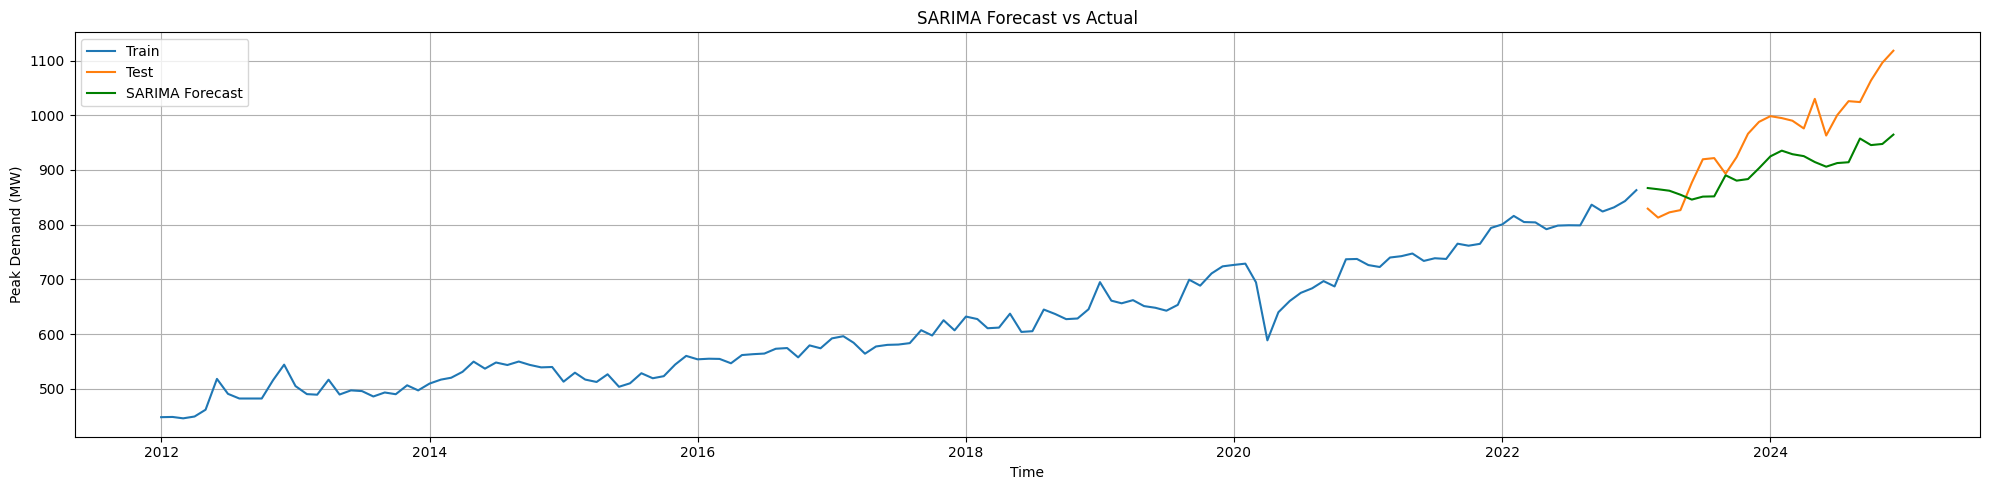

MAPE: 7.22%
MAE: 71.42042634614127, RMSE: 80.42633246201679


In [ ]:
#model fitting
#model = SARIMAX(train_data['Peak Demand(MW)'],
                     #order=(1, 1, 1),
                     #seasonal_order=(1, 1, 1, 12),
                     #enforce_stationarity=True,
                     #enforce_invertibility=True)

model = SARIMAX(train_data['Peak Demand(MW)'], order=(1, 1, 1), seasonal_order=(1, 2, 1, 12))
fitted_model = model.fit()

#forecasting
forecast = fitted_model.forecast(steps=len(test_data))
forecast.index = test_data.index  # Assign correct datetime index

#Plotting
plt.figure(figsize=(20, 5))
plt.plot(train_data['Peak Demand(MW)'], label='Train')
plt.plot(test_data['Peak Demand(MW)'], label='Test')
plt.plot(forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel("Time")
plt.ylabel("Peak Demand (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data['Peak Demand(MW)'], forecast)
rmse = np.sqrt(mean_squared_error(test_data['Peak Demand(MW)'], forecast))
mape = np.mean(np.abs((test_data['Peak Demand(MW)'] - forecast) / test_data['Peak Demand(MW)'])) * 100
print(f'MAPE: {mape:.2f}%')


print(f'MAE: {mae}, RMSE: {rmse}')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


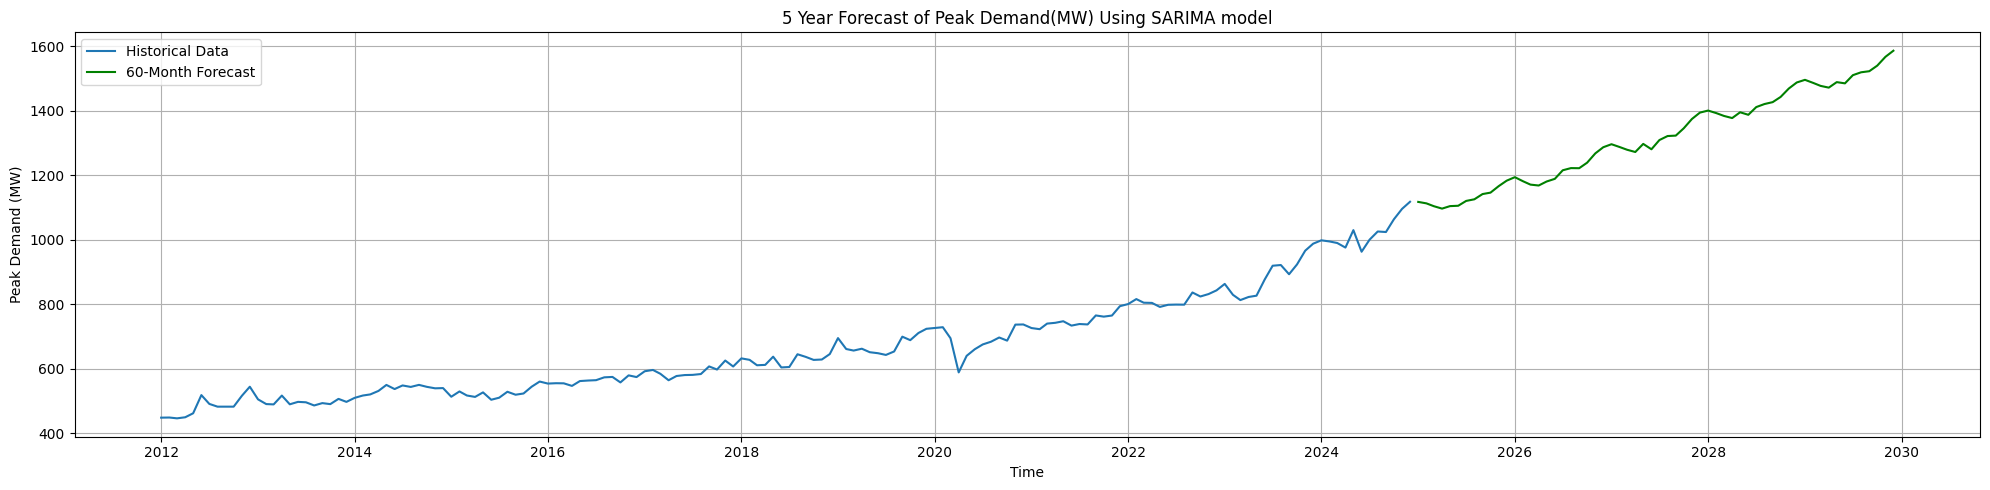

In [ ]:
# 1. Fit the SARIMA model on the full dataset
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit model on the entire dataset
new_full_model = SARIMAX(df['Peak Demand(MW)'],  # full dataset, no split
                     order=(1, 1, 1),
                     seasonal_order=(2, 1, 1, 12),
                     enforce_stationarity=False,
                     enforce_invertibility=False)

fitted_full_model = new_full_model.fit()

# 2. Forecast 60 months into the future
n_months = 60
new_future_forecast = fitted_full_model.forecast(steps=n_months)

# 3. Create future datetime index (assuming your data has monthly frequency)
last_date = df.index[-1]
future_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_months, freq='MS')
new_future_forecast.index = future_index

# 4. Plot historical + forecast
plt.figure(figsize=(20, 5))
plt.plot(new_data['Peak Demand(MW)'], label='Historical Data')
plt.plot(new_future_forecast, label='60-Month Forecast', color='green')
plt.title('5 Year Forecast of Peak Demand(MW) Using SARIMA model')
plt.xlabel("Time")
plt.ylabel("Peak Demand (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
new_future_forecast

,predicted_mean
2025-01-01,1117.476946
2025-02-01,1112.927092
2025-03-01,1104.127684
2025-04-01,1096.667419
2025-05-01,1104.387688
2025-06-01,1105.512348
2025-07-01,1120.512126
2025-08-01,1125.567874
2025-09-01,1141.819317
2025-10-01,1146.244643
